# Books Recommender Engine: Data Cleaning and EDA Part 1

## Problem Statement

Words and stuff to come.

### Contents:
- [Imports](#Imports)
- [Reading in the Data](#Reading-in-the-Data)
- [Preliminary Exploratory Data Analysis](#Preliminary-Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Further Exploratory Data Analysis](#Further-Exploratory-Data-Analysis)
- [Saving the DataFrame](#Saving-the-DataFrame)

## Imports

In [1]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

## Reading in the Data

The dataset is from Book Crossing[1](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) and includes three CSV files broken down by user locations, books, and user ratings. When I first tried to read them into pandas, I got tokenizing errors. I had to open then in Excel to address the problem, which was a few overlapping rows. In the books file, I noticed a bunch of urls that I knew I wouldn't be using, so I went ahead and dropped those columns before uploading and reading in the file. 

In [2]:
#reading in the users file
users = pd.read_csv('./datasets/users.csv', encoding="latin1")
#dropping the unnamed columns
users.drop(columns='Unnamed: 5', inplace = True)
#checking out what's in the file
users.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,User-ID,City,State/Providence,Country,Age
0,1.0,nyc,new york,usa,NaN
1,2.0,stockton,california,usa,18
2,3.0,moscow,yukon territory,russia,NaN
3,4.0,porto,v.n.gaia,portugal,17
4,5.0,farnborough,hants,united kingdom,NaN


In [8]:
#reading in the ratings file
ratings = pd.read_csv('./datasets/ratings.csv', encoding="latin1")
#checking out what's in the file
ratings.head()

,User-ID,ISBN,Book-Rating
0,6360,0,0
1,8094,0,0
2,11795,0,0
3,11795,0,0
4,20859,0,0


In [9]:
#reading in the books file
books = pd.read_csv('./datasets/books.csv', encoding="latin1")
#checking out what's in the file
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,864111835,Sensational Cocktails & Party Drinks Mini Cook...,Family Circle,0,Murdoch Books
1,525447083,Piglet Meets a Heffalump,A A Milne,0,Penguin Putnam~childrens Hc
2,525447148,Christopher Robin Gives Pooh a Party,A A Milne,0,Penguin Putnam~childrens Hc
3,525447105,Kanga and Baby Roo Come to the Forest,A A Milne,0,Penguin Putnam~childrens Hc
4,525447075,Pooh Goes Visiting and Pooh and Piglet Nearl,A A Milne,0,Penguin Putnam~childrens Hc


## Preliminary Exploratory Data Analysis

In [10]:
#taking a look at the user file types
users.dtypes

User-ID             float64
City                 object
State/Providence     object
Country              object
Age                  object
dtype: object

In [11]:
#taking a look at the ratings file types
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [12]:
#taking a look at the books file types
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
dtype: object

In [13]:
#any nulls in the users file?
users.isnull().sum()

User-ID                  4
City                   556
State/Providence     16241
Country               4663
Age                 110657
dtype: int64

In [14]:
#noting lots of nulls in the users file, any in the ratings file?
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
#nice on the lack of nulls in the ratings file, how about books?
books.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher              1347
dtype: int64

In [16]:
#how many unique countries are there
users['Country'].unique()

array(['usa', 'russia', 'portugal', 'united kingdom', 'canada', 'spain',
       'australia', 'brazil', nan, 'germany', 'mexico', 'china', 'italy',
       'distrito federal', 'france', 'netherlands', 'iraq', 'finland',
       'new zealand', 'india', 'ghana', 'switzerland', 'slovenia', 'iran',
       'peru', 'bosnia and herzegovina', 'vietnam', 'sri lanka',
       'pakistan', 'denmark', 'belgium', 'malaysia', 'u.a.e', 'turkey',
       'philippines', 'greece', 'colombia', 'norway', 'kuwait', 'chile',
       'quit', 'lj', 'taiwan', 'espaÃ±a', 'sweden', 'argentina',
       'nigeria', 'london', 'bulgaria', 'austria', 'romania', 'victoria',
       'singapore', 'albania', 'egypt', 'tunisia', 'uzbekistan', 'qatar',
       'syria', 'saudi arabia', 'indonesia', 'sudan', 'british columbia',
       'missouri', 'somewherein space', 'poland', 'thailand',
       'metropolitana', 'ireland', 'venezuela', 'paraguay', 'mozambique',
       'morocco', 'afghanistan', 'estonia', 'clackamas', 'lesotho',
      

Based on what the countries look like, I will not be able to use location information. They have states mixed in with countries. I can also see that users typed in this info by hand because "heard of it? :o)" and "somewherein space" are not locations, let alone countries. This data would have to be assessed line by line to see if there is any valid use for it, and do to the tight timeline contraints for this project, added to the fact that I wasn't planning to include location in the recommender engine, I'll be ignoring the user location CSV file moving forward.

In [17]:

ratings['User-ID'].value_counts().head()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: User-ID, dtype: int64

**NOTE TO FIX THIS or remove it before submitting**

In [132]:
#There is a lot of errors in the ISBN column for ratings. Were users entering these by hand? 
ratings['ISBN'].sort_values(ascending=True).head()

TypeError: '<' not supported between instances of 'str' and 'int'

In [133]:
#books file does not appear to have the same flawed ISBNS as the ratings file, let's see what else needs
#to be cleaned up before diving into that though
books['ISBN'].sort_values(ascending=True).head()

95914    000104687X
99346    000104799X
4667     000123207X
32190    000160418X
34476    000171421X
Name: ISBN, dtype: object

In [134]:
#I want to confirm that we have ratings entered correctly. 0 means they haven't rated it. 
#Ratings are on a scale of 1-10 per data dictionary. So this looks like we have a correct range of numbers here.
ratings['Book-Rating'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [135]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,864111835,Sensational Cocktails & Party Drinks Mini Cook...,Family Circle,0,Murdoch Books
1,525447083,Piglet Meets a Heffalump,A A Milne,0,Penguin Putnam~childrens Hc
2,525447148,Christopher Robin Gives Pooh a Party,A A Milne,0,Penguin Putnam~childrens Hc
3,525447105,Kanga and Baby Roo Come to the Forest,A A Milne,0,Penguin Putnam~childrens Hc
4,525447075,Pooh Goes Visiting and Pooh and Piglet Nearl,A A Milne,0,Penguin Putnam~childrens Hc


In [136]:
#taking a closer look at the publishers. 
books['Publisher'].value_counts()

Pocket                                 3688
Ballantine Books                       3451
Bantam Books                           3262
Simon & Schuster                       2667
Penguin Books                          2610
Warner Books                           2593
Berkley Publishing Group               2534
Penguin USA                            2515
Harlequin                              2407
Scholastic                             2269
Harpercollins                          2224
Fawcett Books                          2158
Signet Book                            1930
Random House Inc                       1850
St Martins Pr                          1759
Zebra Books                            1632
St. Martin's Press                     1607
HarperCollins Publishers               1576
Tor Books                              1489
Avon                                   1468
Bantam                                 1438
Vintage Books USA                      1415
Harper Mass Market Paperbacks Mm

**ADDRESS PUBLISHER ODD CHARACTERS HERE**

## Data Cleaning

In [137]:
#combining the ratings and books dataframes
book_ratings = pd.merge(ratings, books, on='ISBN')
book_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,147965,1551669498,0,Girls Night,Stef Ann Holm,2002,Mira
1,150968,1551669498,0,Girls Night,Stef Ann Holm,2002,Mira
2,153662,1551669498,0,Girls Night,Stef Ann Holm,2002,Mira
3,153723,1551669498,0,Girls Night,Stef Ann Holm,2002,Mira
4,164027,1551669498,0,Girls Night,Stef Ann Holm,2002,Mira


In [138]:
#how big is the file
book_ratings.shape

(403132, 7)

## Further Exploratory Data Analysis

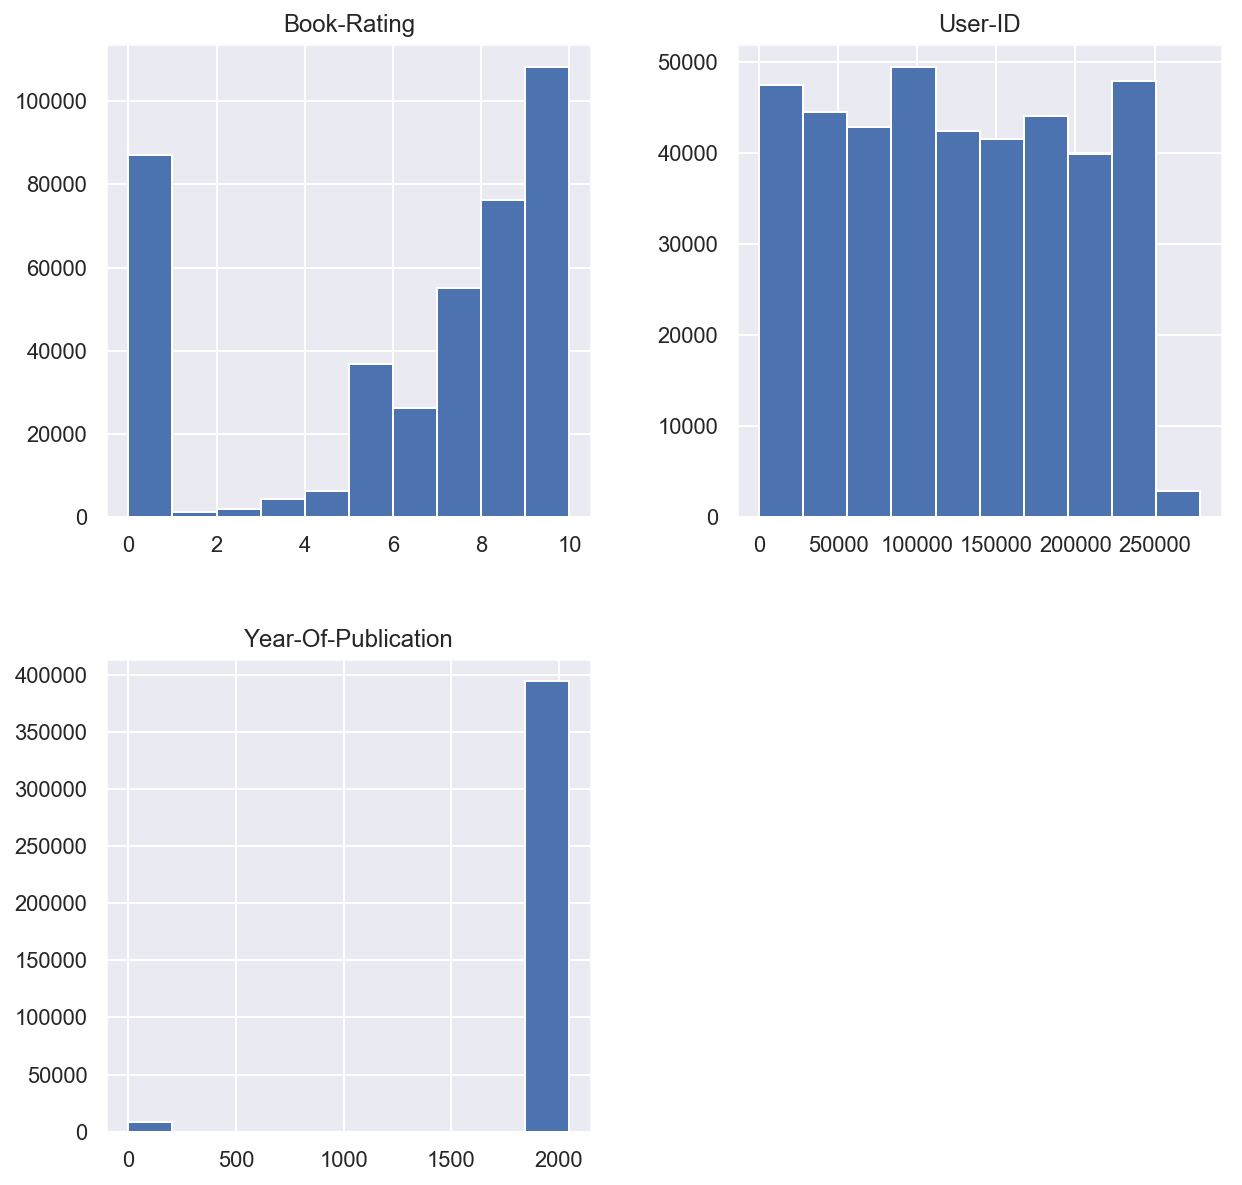

In [139]:
#checking out the numeric columns
book_ratings.hist(figsize=(10,10));

What we an see by this is that we have a lot of unrated books, as well as a lot of missing years.

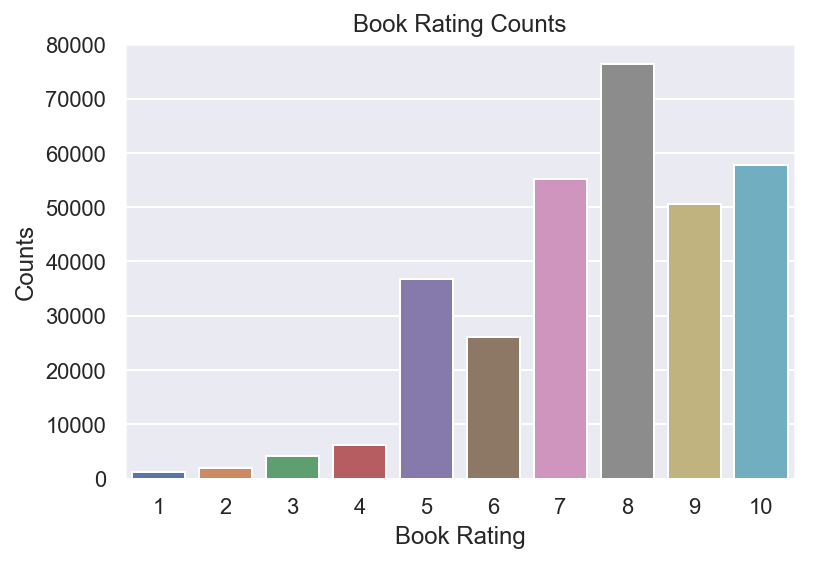

In [140]:
#plotting explicit ratings to see the counts
#I pulled out the implicit counts since those are not votes
explicit_ratings = book_ratings[book_ratings['Book-Rating'] != 0]
sns.set(style="darkgrid")
ax = sns.countplot(x="Book-Rating", data=explicit_ratings)
plt.title("Book Rating Counts")
plt.ylabel("Counts")
plt.xlabel("Book Rating");

It's interesting to see the skew here. Of the titles voted on, people seemed to really favor whatever it was that they read. Next, I want to take a look at what the most popular books are for these users.

In [141]:
#geting the sums of the explicit ratings per isbn
ratings_sums = pd.DataFrame(explicit_ratings.groupby(['ISBN'])['Book-Rating'].sum())
#soriting so the favorites show up at the top
favorites = ratings_sums.sort_values('Book-Rating', ascending = False)
#merging with the books csv by isbn
favorite_books = favorites.merge(books, left_index = True, right_on = 'ISBN')

In [146]:
#let's look at the top 10 rated books
favorite_books.head(20)

,Book-Rating,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
200155,5188,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,Little
217288,3814,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
142949,2890,312195516,The Red Tent Bestselling Backlist,Anita Diamant,1998,Picador USA
161371,2546,059035342X,Harry Potter and the Sorcerer's Stone Harry Po...,J. K. Rowling,1999,Arthur A. Levine Books
226155,2404,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
231380,2337,971880107,Wild Animus,Rich Shapero,2004,Too Far
139706,2292,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
143678,2145,446672211,Where the Heart Is Oprah's Book Club Paperback,Billie Letts,1998,Warner Books
187813,2043,671027360,Angels & Demons,Dan Brown,2001,Pocket Star
199169,2040,452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


In [143]:
#I want to take a look at how many ratings there are per user, but only for those things they actually rated
#so using the explicit_ratings df I created for this
user_counts = explicit_ratings['User-ID'].value_counts()

In [144]:
#there are an awful lot of 1 rating users in there. 
user_counts.head()

11676     6314
98391     4976
153662    1620
189835    1547
23902     1111
Name: User-ID, dtype: int64

## Saving the DataFrame

In [145]:
#saving the explicit_ratings dataframe to a csv
explicit_ratings.to_csv('./datasets/explicit_ratings.csv')